In [1]:
#%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

 




'2.8.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers



In [3]:
signal_df = pd.read_csv("Signal.csv")
signal_df.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
#B. Check for missing values and print percentage for each attribute.

In [5]:
signal_df.isna().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

In [6]:
print (signal_df.isnull().sum() * 100 /len(signal_df))

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [7]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:

# Signal Strength is actually a categorical value indicating signal strenth 
#the other parameters are all float values.

In [9]:
# C. Check for presence of duplicate records in the dataset and impute with appropriate method

In [10]:
signal_df.duplicated().any()

True

In [11]:
signal_df.duplicated().sum()

240

In [12]:
signal_df.drop_duplicates(keep = 'first',inplace = True)

In [13]:
signal_df.shape

(1359, 12)

In [14]:
#D. Visualise distribution of the target variable

<AxesSubplot:xlabel='Signal_Strength', ylabel='Count'>

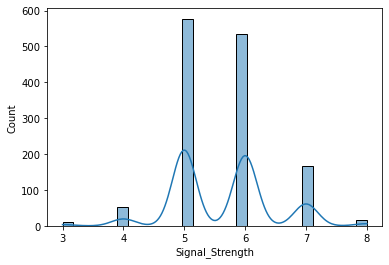

In [15]:
sns.histplot(data = signal_df, x = "Signal_Strength", kde = True)

In [16]:
signal_df['Signal_Strength'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [17]:
#E. Share insights from the initial data analysis (at least 2) ans:The signal strenth which is the target show 
#almost a uniform distribution across the strength corresponding to '4,5,6,7'.
# Majority of the signal waves fall into the category of '5'and '6' of which the class'5' is having most signals. 
#the category '4' and '7' though show remarkable cluster of signal strenth the waves are falling on. 
#the category '3' and '4' are sparse when considering the class of signal strenth,
#which indicates that very weak and very strong signals are found least in count in our case. 
#The dataset seems to be imbalanced among the varoius strength values and not equally.

In [18]:
#2.Data preprocessing A. Split the data into X & Y.

In [19]:
X = signal_df.drop(['Signal_Strength'], axis=1)
Y = signal_df['Signal_Strength']

In [20]:
#B. Split the data into train & test with 70:30 proportion.

In [21]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state =7)

In [22]:
#C. Print shape of all the 4 variables and verify if train and test data is in sync.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(951, 11)
(408, 11)
(951,)
(408,)


In [23]:
#the test train data is in sync.

Y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: Signal_Strength, dtype: int64

In [24]:
#D. Normalise the train and test data with appropriate method.

In [25]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)


In [26]:
#E. Transform Labels into format acceptable by Neural Network
# encode class values as integers
from keras.utils import np_utils

# convert integers to dummy variables (i.e. one hot encoded)
y_train_cat = np_utils.to_categorical(y_train)
print(y_train_cat)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [27]:
print(y_train_cat.shape)

(951, 9)


In [28]:

y_test_cat = np_utils.to_categorical(y_test)

print((y_test_cat.shape))

(408, 9)


In [29]:
#3. Model Training & Evaluation using Neural Network 
#A. Design a Neural Network to train a classifier. 

In [30]:
model = Sequential()
model.add(Dense(20, input_shape = (11,), activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(9))
model.add(Activation('softmax'))


In [31]:
sgd = optimizers.Adam(lr = 0.01)

C:\Users\vrooky-montzo\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 9)                 189       
                                                                 
 activation (Activation)     (None, 9)                 0         
                                                                 
Total params: 849
Trainable params: 849
Non-trainable params: 0
_________________________________________________________________


B. Train the classifier using previously designed Architecture

In [34]:
history =model.fit(X_train, y_train_cat, batch_size = 100, epochs = 100, validation_split=0.2, verbose = 1)

Epoch 1/100
8/8 [==============================] - 1s 41ms/step - loss: 1.8485 - accuracy: 0.4053 - val_loss: 1.5626 - val_accuracy: 0.4031
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 1.5007 - accuracy: 0.4053 - val_loss: 1.3215 - val_accuracy: 0.4031
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 1.3163 - accuracy: 0.4105 - val_loss: 1.2112 - val_accuracy: 0.4450
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 1.2762 - accuracy: 0.3961 - val_loss: 1.1855 - val_accuracy: 0.4450
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 1.2478 - accuracy: 0.4118 - val_loss: 1.1715 - val_accuracy: 0.4136
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 1.2356 - accuracy: 0.4066 - val_loss: 1.1641 - val_accuracy: 0.4607
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 1.2241 - accuracy: 0.4697 - val_loss: 1.1486 - val_accuracy: 0.5026
Epoch 8/100
8/8 [=========

In [35]:
results = model.evaluate(X_test, y_test_cat)

13/13 [==============================] - 0s 2ms/step - loss: 0.9951 - accuracy: 0.5466


Accuracy is found to be 57.35%. 

C. Plot 2 separate visuals. 
i. Training Loss and Validation Loss

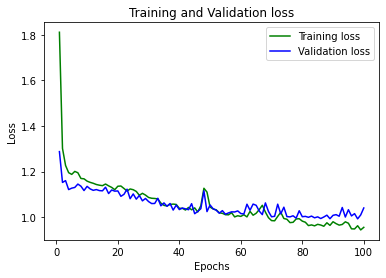

In [44]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs =range(1,101)
plt.plot(epochs,loss_train, 'g', label = 'Training loss')
plt.plot(epochs,loss_val, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#the training process converged well with bumps in the line curves.

3.ii. Training Accuracy and Validation Accuracy

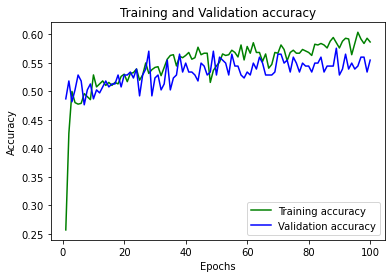

In [45]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,loss_train, 'g', label = 'Training accuracy')
plt.plot(epochs,loss_val, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Both the loss curve and Accuracy curve seem to be vibrating(not smooth curves). but the training and validation follow the pattern very close.However, the accuracy curve for train and validation shows that our model without dropout and batch normalization is much less an overfit.As expected validation loss is decreased as the model learns and gives a pattern that is ideal of a good learning rate.

## D. Design new architecture/update existing architecture in attempt to improve the performance of the model. 

In [46]:
def opt_model():
    model = Sequential()
    
    model.add(Dense(20, input_shape = (11, ), kernel_initializer='he_normal'))
    
    model.add(Dense(20 ,kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(20, kernel_initializer='he_normal'))
    model.add(Activation('relu'))    
    model.add(Dense(9, kernel_initializer='he_normal'))   
    model.add(Activation('softmax'))

    sgd = optimizers.Adam(lr = 0.01)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [47]:
model = opt_model()
history = model.fit(X_train, y_train_cat, batch_size=100, epochs = 100, validation_split =0.2,verbose = 1)

Epoch 1/100
8/8 [==============================] - 1s 44ms/step - loss: 1.7766 - accuracy: 0.3579 - val_loss: 1.2992 - val_accuracy: 0.3979
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 1.3432 - accuracy: 0.4579 - val_loss: 1.1746 - val_accuracy: 0.4764
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 1.2205 - accuracy: 0.4724 - val_loss: 1.1713 - val_accuracy: 0.4974
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 1.1844 - accuracy: 0.5039 - val_loss: 1.1182 - val_accuracy: 0.5026
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 1.1781 - accuracy: 0.5118 - val_loss: 1.1233 - val_accuracy: 0.4974
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 1.1722 - accuracy: 0.5092 - val_loss: 1.1294 - val_accuracy: 0.5183
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 1.1697 - accuracy: 0.5237 - val_loss: 1.1353 - val_accuracy: 0.4817
Epoch 8/100
8/8 [=========

In [48]:
results_1 = model.evaluate(X_test, y_test_cat)

13/13 [==============================] - 0s 2ms/step - loss: 0.9992 - accuracy: 0.6005


E. Plot visuals as in Q3.C and share insights about difference observed in both the models. 

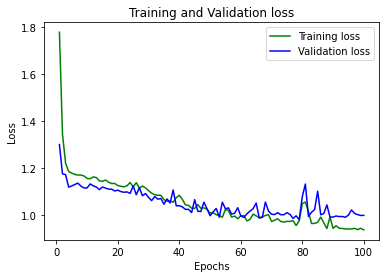

In [49]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs =range(1,101)
plt.plot(epochs,loss_train, 'g', label = 'Training loss')
plt.plot(epochs,loss_val, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


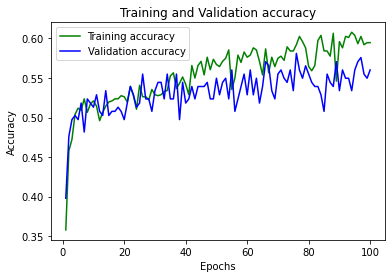

In [50]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,loss_train, 'g', label = 'Training accuracy')
plt.plot(epochs,loss_val, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
#with the addition of kernel initializer the learning rate decreases gradually as seen from the loss curve the steepness is decreased. 
#with the batchnormalisation and dropout we coud not increase the accuracy better. 
# a slight increase of 1 % accuracy could be achieved with the he normal initialiser.
#bumpy curves are attained